In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from functools import reduce
OUTPUT = '/home/twalton_umass_edu/Political Polarization Project/final/figures/'

topics = {"X0": "education", "X1": "names", "X2": "punish_law", "X3": "racism",
                       "X4": "covid", "X5": "event", "X6": "trump", "X7": "verbs", "X8": "congress_bills",
                       "X9": "spam", "X10": "right_outrage", "X11": "primaries", "X12": "vp_nomination",
                       "X13": "russia", "X14": "hero_RBG_BLM_Lewis", "X15": "arguments", "X16": "fed_investigation",
                       "X17": "social_media", "X18": "healthcare", "X19": "senate_race", "X20": "contractions",
                       "X21": "vote_tomorrow", "X22": "mixture", "X23": "protest", "X24": "scotus",
                       "X25": "institutions", "X26": "climate", "X27": "economy", "X28": "vote_methods",
                       "X29": "knew_had", "X30": "family", "X31": "date_time", "X32": "grateful",
                       "X33": "slang", "X34": "celebrate", "X35": "progress_fight", "X36": "geographic_location",
                       "X37": "food", "X38": "slang_2", "X39": "numbers", "X40": "covid_restrictions", "X41": "trump_2",
                       "X42": "holiday", "X43": "sport", "X44": "news_media", "X45": "no_topic"}
#read in most recent final product
df = pd.read_csv('/home/twalton_umass_edu/Political Polarization Project/final/final_product_topic_45_20210427.csv')

df = df.rename(columns = topics)

#only want republicans
df = df[df['dem_org'] == 1]

list_topics = []
for key, value in topics.items():
    list_topics.append(df.groupby(['school']).apply(lambda x: x[value].sum() / x['num_tweets'].sum()).reset_index(name = value))
    
counts = reduce(lambda df1,df2: pd.merge(df1,df2,on='school'), list_topics)
del list_topics

counts = counts.drop(columns = ['verbs', 'spam', 'social_media', 'contractions', 'mixture', 'knew_had', 'date_time', 'grateful', 'slang', 'geographic_location'
                               ,'food', 'slang_2', 'holiday', 'sport', 'no_topic'])

#remove from topics dictionary
topics = {key:val for key, val in topics.items() if val not in ['verbs', 'spam', 'social_media', 'contractions', 'mixture', 'knew_had', 'date_time', 'grateful', 'slang', 'geographic_location'
                                                               ,'food', 'slang_2', 'holiday', 'sport', 'no_topic']}

In [2]:
#set index to school
x = counts.set_index('school')
#scale the averages to be between 0 and one
x = StandardScaler().fit_transform(x)

#run pca with 2 components
pca = PCA(n_components=3)
#fit the pca
principalComponents = pca.fit_transform(x)
#create the final pc dataframe
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

#add the index
finalDf = pd.concat([principalDf, counts['school']], axis = 1)

In [3]:
pca.explained_variance_ratio_

array([0.5193242 , 0.20161744, 0.12537708])

In [4]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=topics.values())

large_pc1 = loadings.nlargest(3,['PC1'])
small_pc1 = loadings.nsmallest(3,['PC1'])

large_pc2 = loadings.nlargest(3,['PC2'])
small_pc2 = loadings.nsmallest(3,['PC2'])

large_pc3 = loadings.nlargest(3,['PC3'])
small_pc3 = loadings.nsmallest(3,['PC3'])

loadings_1 = pd.concat([large_pc1, small_pc1, large_pc2, small_pc2])[['PC1', 'PC2']]

loadings_2 = pd.concat([large_pc2, small_pc2, large_pc3, small_pc3])[['PC2', 'PC3']]

loadings_3 = pd.concat([large_pc1, small_pc1, large_pc3, small_pc3])[['PC1', 'PC3']]

In [5]:
loadings_1

,PC1,PC2
event,0.223837,-0.125804
family,0.177762,0.216327
education,0.168854,-0.265909
protest,-0.242627,0.042192
trump_2,-0.234027,0.065251
vp_nomination,-0.233268,-0.032636
numbers,-0.189413,0.228611
family,0.177762,0.216327
covid,-0.203160,0.185733
celebrate,-0.072866,-0.312270


Text(0, 0.5, 'Principal Component 2')

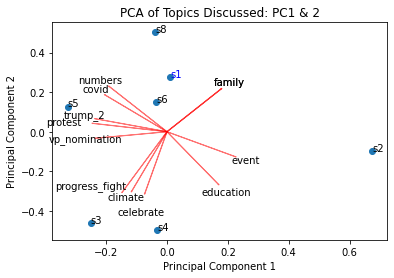

In [6]:
#pc1 * pc2
x = finalDf['pc1']
scalex = 1.0/(x.max() - x.min())

y = finalDf['pc2']
scaley = 1.0/(y.max() - y.min())

load = loadings_1

plt.scatter(x*scalex, y*scaley)
for i, txt in enumerate(finalDf['school']):
    if txt == 's1':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "blue")
    else:
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley))
for i in range(len(load)):
    plt.arrow(0, 0, load.iloc[i,0], load.iloc[i,1],color = 'r',alpha = 0.5)
    if load.index[i] == 'names':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*.9, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'trump_2':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'protest':
        plt.text(load.iloc[i,0]*1.4, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'senate_race':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*.2, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'progress_fight':
            plt.text(load.iloc[i,0]*1.7, load.iloc[i,1]*.9, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'climate':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'celebrate':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'sport':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.5, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'holiday':
        plt.text(load.iloc[i,0]*1.4, load.iloc[i,1]*.7, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'date_time':
        plt.text(load.iloc[i,0]*1.4, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
    else:
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
        
plt.title("PCA of Topics Discussed: PC1 & 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


In [7]:
loadings_2

,PC2,PC3
numbers,0.228611,-0.083052
family,0.216327,0.107391
covid,0.185733,0.013402
celebrate,-0.312270,-0.142177
progress_fight,-0.304999,-0.094422
climate,-0.301296,0.120901
names,0.185249,0.391874
congress_bills,-0.225171,0.358289
scotus,-0.244963,0.237594
vote_tomorrow,-0.038968,-0.460705


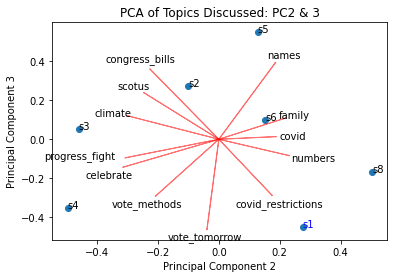

<Figure size 432x288 with 0 Axes>

In [8]:
#pc2 * pc3
x = finalDf['pc2']
scalex = 1.0/(x.max() - x.min())

y = finalDf['pc3']
scaley = 1.0/(y.max() - y.min())

load = loadings_2

plt.scatter(x*scalex, y*scaley)
for i, txt in enumerate(finalDf['school']):
    if txt == 's1':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "blue")
    else:
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley))
for i in range(len(load)):
    plt.arrow(0, 0, load.iloc[i,0], load.iloc[i,1],color = 'r',alpha = 0.5)
    if load.index[i] == 'names':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'covid':
        plt.text(load.iloc[i,0]*1.3, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'numbers':
        plt.text(load.iloc[i,0]*1.35, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'vote_tomorrow':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'progress_fight':
            plt.text(load.iloc[i,0]*1.5, load.iloc[i,1]*.9, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'climate':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'celebrate':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'sport':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.5, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'holiday':
        plt.text(load.iloc[i,0]*1.4, load.iloc[i,1]*.7, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'date_time':
        plt.text(load.iloc[i,0]*1.4, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
    else:
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
        
plt.title("PCA of Topics Discussed: PC2 & 3")
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")
fig2 = plt.figure()

In [51]:
loadings_3

,PC1,PC3
event,0.223837,0.067356
family,0.177762,0.107391
education,0.168854,0.078119
protest,-0.242627,0.017942
trump_2,-0.234027,-0.057460
vp_nomination,-0.233268,0.098523
names,-0.078045,0.391874
congress_bills,-0.065483,0.358289
scotus,-0.111230,0.237594
vote_tomorrow,0.022673,-0.460705


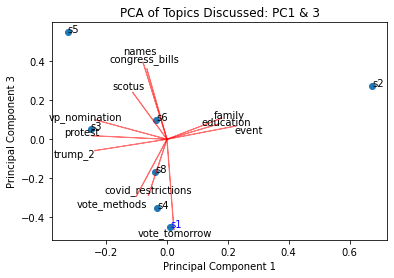

<Figure size 432x288 with 0 Axes>

In [9]:
#pc1 * pc3
x = finalDf['pc1']
scalex = 1.0/(x.max() - x.min())

y = finalDf['pc3']
scaley = 1.0/(y.max() - y.min())

load = loadings_3

plt.scatter(x*scalex, y*scaley)
for i, txt in enumerate(finalDf['school']):
    if txt == 's1':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "blue")
    else:
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley))
for i in range(len(load)):
    plt.arrow(0, 0, load.iloc[i,0], load.iloc[i,1],color = 'r',alpha = 0.5)
    if load.index[i] == 'protest':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*2.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'trump_2':
        plt.text(load.iloc[i,0]*1.3, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'senate_race':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'vote_tomorrow':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.05, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'covid_restrictions':
            plt.text(load.iloc[i,0]*1, load.iloc[i,1]*.9, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'climate':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'celebrate':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'sport':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.5, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'event':
        plt.text(load.iloc[i,0]*1.2, load.iloc[i,1]*.7, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'vote_methods':
        plt.text(load.iloc[i,0]*1.8, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
    else:
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
        
plt.title("PCA of Topics Discussed: PC1 & 3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
fig3 = plt.figure()